In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [9]:
df = pd.read_csv('datasets/titanic.csv')

In [10]:
df.iloc[11,:]

pclass                        1
survived                      0
name        Baumann, Mr. John D
sex                        male
age                         NaN
sibsp                         0
parch                         0
fare                     25.925
embarked                      S
Name: 11, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
pclass      1257 non-null int64
survived    1257 non-null int64
name        1257 non-null object
sex         1257 non-null object
age         996 non-null float64
sibsp       1257 non-null int64
parch       1257 non-null int64
fare        1257 non-null float64
embarked    1257 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 88.5+ KB


In [12]:
df.nunique()

pclass         3
survived       2
name        1255
sex            2
age           76
sibsp          7
parch          8
fare         274
embarked       3
dtype: int64

In [13]:
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         261
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [6]:
fig = go.Figure(data = go.Histogram(x = df.age), layout = go.Layout(title = 'Age Distribution', xaxis = dict(title = 'Age')))
py.iplot(fig)

In [7]:
df['age'].describe()

count    996.000000
mean      29.070783
std       12.819750
min        1.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       60.000000
Name: age, dtype: float64

In [5]:
df['age'].fillna(28, inplace = True)

In [6]:
def group_age(df):
    if df['age']<=15:
        return '0-15'
    elif (df['age']>15) & (df['age']<=25):
        return '15-25'
    elif (df['age']>25) & (df['age']<=35):
        return '25-35'
    elif (df['age']>35) & (df['age']<=45):
        return '35-45'
    else:
        return '45-60'

In [7]:
df['age group'] = df.apply(lambda df: group_age(df), axis = 1)

In [11]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,25-35
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,0-15
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S,25-35
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,15-25
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,45-60


In [12]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [8]:
df['survived']=df['survived'].replace({1:'Yes', 0:'No'})

In [9]:
target_cols = ['survived']

In [15]:
target_cols

['survived']

In [10]:
Id_cols = ['name']

In [11]:
num_cols = df[df.select_dtypes(include = np.number).columns]

In [12]:
num_cols = num_cols.columns.tolist()

In [13]:
num_cols

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [14]:
cat_cols = df[df.select_dtypes(include = np.object).columns]

In [15]:
cat_cols = cat_cols.columns.tolist()

In [16]:
cat_cols

['survived', 'name', 'sex', 'embarked', 'age group']

In [17]:
cat_cols.remove('name')

In [18]:
cat_cols

['survived', 'sex', 'embarked', 'age group']

In [20]:
survived = df[df['survived'] == 'Yes']
not_survived = df[df['survived'] == 'No']

In [27]:
data = go.Pie(labels = df.survived.value_counts().keys().tolist(), values = df.survived.value_counts().values.tolist(), hole = 0.6)
layout = go.Layout(title = 'Survival Distribution', annotations = [dict(text = 'Survival', showarrow = False, font_size = 18)])
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [67]:
def plot_pie(column):
    data1 = go.Pie(labels = survived[column].value_counts().keys().tolist(), values =survived[column].value_counts().values.tolist(), domain = dict(x = [0, 0.48]), hole = 0.6)
    data2 = go.Pie(labels = not_survived[column].value_counts().keys().tolist(), values = not_survived[column].value_counts().values.tolist(), domain = dict(x = [0.52, 1]), hole = 0.6)
    layout = go.Layout(title = 'Distribution of survival based on ' + column, annotations = [dict(text = 'Survived', x = 0.18,font_size = 18, showarrow = False), dict(text = 'Not Survived', x = 0.83,font_size = 18, showarrow = False)])
    fig = go.Figure(data = [data1, data2], layout = layout)
    py.iplot(fig)

In [68]:
for i in cat_cols:
    plot_pie(i)

In [30]:
data_age = go.Pie(labels = df['age group'].value_counts().keys().tolist(), values = df['age group'].value_counts().values.tolist(), hole = 0.6)
layout_age = go.Layout(title = 'age Distribution', annotations = [dict(text = 'age group', showarrow = False, font_size = 18)])
fig = go.Figure(data = data_age, layout = layout_age)
py.iplot(fig)

In [31]:
data_emb = go.Pie(labels = df.embarked.value_counts().keys().tolist(), values = df.embarked.value_counts().values.tolist(), hole = 0.6)
layout_emb = go.Layout(title = 'Embarked Distribution', annotations = [dict(text = 'Embarked', showarrow = False, font_size = 18)])
fig = go.Figure(data = data_emb, layout = layout_emb)
py.iplot(fig)

In [74]:
plot_pie('sibsp')

In [75]:
plot_pie('parch')

In [32]:
def histogram(column):
    data3= go.Histogram(x = survived[column], name = 'Survived', histnorm = 'percent')
    data4 = go.Histogram(x = not_survived[column], name = 'Not Survived', histnorm = 'percent')
    layout = go.Layout(title = 'Impact of '+ column+ ' on Survival', xaxis=dict(title = column), yaxis = dict(title = 'Percent'))
    fig= go.Figure(data = [data3, data4], layout = layout)
    py.iplot(fig)

In [33]:
for i in num_cols:
    histogram(i)

In [34]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age group
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,25-35
1,1,No,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,0-15
2,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S,25-35
3,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,15-25
4,1,Yes,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,45-60


In [35]:
def scatter_matrix(df):
    df = df.sort_values(by = 'survived', ascending = True)
    classes = df.survived.unique().tolist()
    class_code = {classes[k]: k for k in range(2)}
    color_code = [class_code[cl] for cl in df['survived']]
    text = [df.loc[k,'survived'] for k in range(len(df))]
    
    trace = go.Splom(dimensions = [dict(label = 'pclass', values = df.pclass), 
                                   dict(label= 'age', values = df.age),
                                   dict(label='sibsp', values = df.sibsp),
                                   dict(label = 'parch', values = df.parch),
                                   dict(label = 'fare', values = df.fare)],
                    text = text,
                    marker = dict(color = color_code, colorscale = 'Portland'))
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 1200,
                            width  = 1200, showlegend = True))
    py.iplot(go.Figure(data = trace, layout = layout))

In [36]:
scatter_matrix(df)

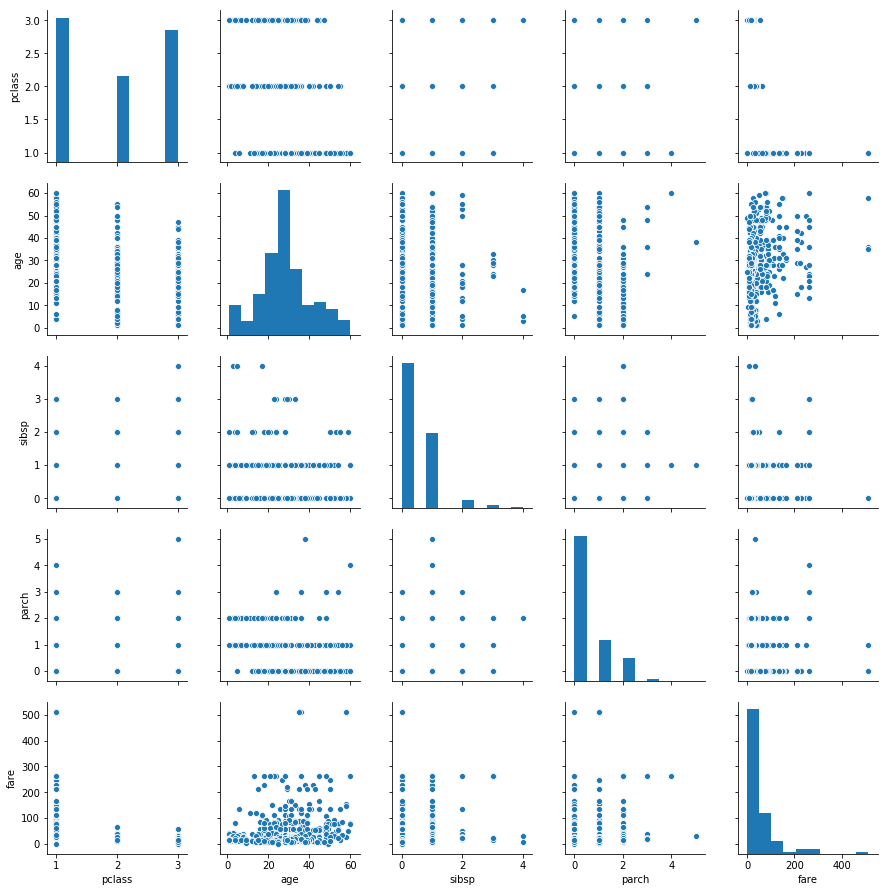

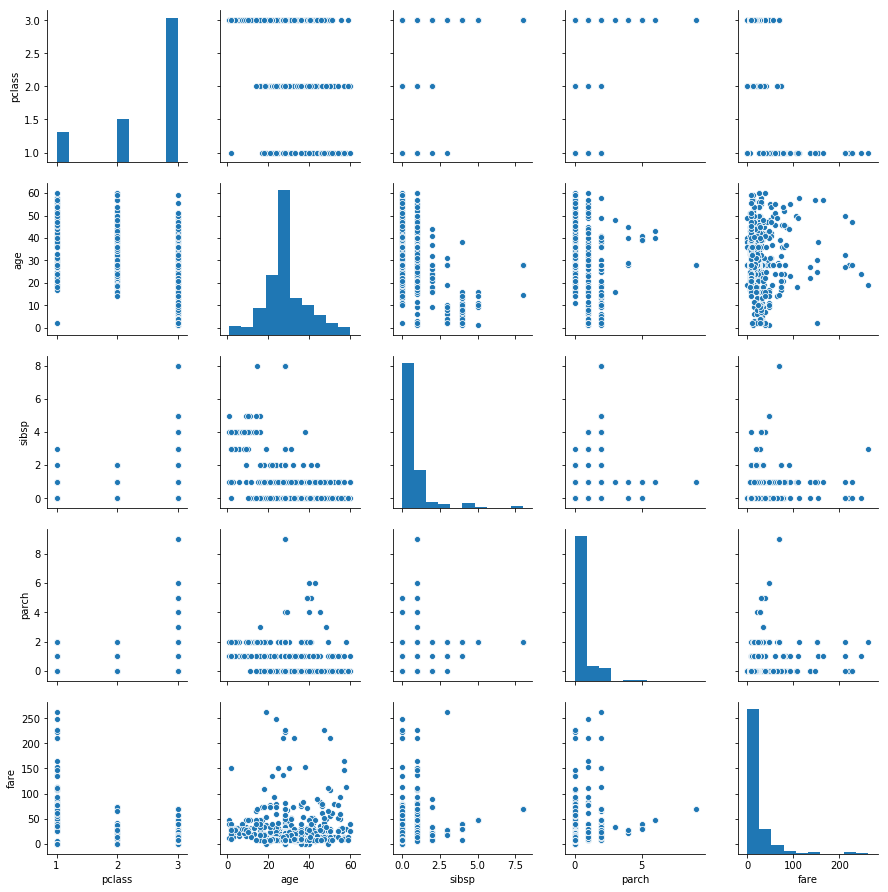

In [37]:
sns.pairplot(survived)
sns.pairplot(not_survived)

In [38]:
plot_pie('pclass')

In [39]:
correlation = df.corr()
matrix_cols = correlation.columns.tolist()
corr_array = np.array(correlation)
data = go.Heatmap(z=corr_array, x = matrix_cols, y = matrix_cols, colorscale = 'Viridis')
layout = go.Layout(title = 'Correlation Heatmap', height = 720, width = 800)
fig = go.Figure(data, layout)
py.iplot(fig)

In [21]:
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [22]:
sc = StandardScaler()
le = LabelEncoder()

In [23]:
df_model = df.copy()

In [24]:
df_model.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age group
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,25-35
1,1,No,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,0-15
2,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S,25-35
3,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,15-25
4,1,Yes,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,45-60


In [25]:
df_model.drop(['name', 'age group'], axis = 1, inplace = True)

In [26]:
df_model['survived']= le.fit_transform(df_model['survived'])
df_model['sex']= le.fit_transform(df_model['sex'])
df_model = pd.get_dummies(data = df_model, columns = ['embarked'])
scaled = sc.fit_transform(df_model[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [27]:
df_model.drop(num_cols, axis =1, inplace = True)
df_model = df_model.merge(scaled, left_index = True,right_index = True, how = 'left')

In [28]:
df_model.head()

,survived,sex,embarked_C,embarked_Q,embarked_S,pclass,age,sibsp,parch,fare
0,1,0,0,0,1,-1.575857,0.013278,-0.475280,-0.438029,3.494923
1,0,0,0,0,1,-1.575857,-2.352237,0.471514,1.880297,2.325084
2,0,1,0,0,1,-1.575857,0.100889,0.471514,1.880297,2.325084
3,0,0,0,0,1,-1.575857,-0.337169,0.471514,1.880297,2.325084
4,1,1,0,0,1,-1.575857,1.677899,-0.475280,-0.438029,-0.120744


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
lr = LogisticRegression()

In [48]:
y = ['survived']
X = [x for x in df_model if x not in y]

In [49]:
print(X)
print(y)

['sex', 'embarked_C', 'embarked_Q', 'embarked_S', 'pclass', 'age', 'sibsp', 'parch', 'fare']
['survived']


In [50]:
rfe = RFE(lr, 18)
rfe = rfe.fit(df_model[X], df_model[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [51]:
X = df_model[X]
y = df_model[y]

In [52]:
import statsmodels.api  as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.458461
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1257
Model:                          Logit   Df Residuals:                     1248
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Sep 2019   Pseudo R-squ.:                  0.3109
Time:                        21:58:29   Log-Likelihood:                -576.29
converged:                       True   LL-Null:                       -836.34
                                        LLR p-value:                3.385e-107
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -2.6036      0.164    -15.900      0.000      -2.925      -2.283
embarked_C     1.5505      0.201      7.712      0.000       1.156       1.945
embarked_Q     0.9727      0.242      4.015      0.000       0.498       1.447
embarked_S     0.8866      0.132      6.716      0.000       0.628       1.145
pclass        -0.7620      0.099     -7.666      0.000      -0.957      -0.567
age           -0.3571      0.081     -4.392      0.000      -0.516      -0.198
sibsp         -0.3091      0.096     -3.221      0.001      -0.497      -0.121
parch         -0.0485      0.081     -0.601      0.548      -0.207       0.110
fare           0.1128      0.104      1.088      0.277      -0.090       0.316
==============================================================================
"""

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)
lr.fit(X_train, y_train)

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Prometheus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred = lr.predict(X_test)

In [55]:
lr.score(X_test,y_test)

0.8068783068783069

In [56]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.787


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[205  33]
 [ 40 100]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       238
           1       0.75      0.71      0.73       140

   micro avg       0.81      0.81      0.81       378
   macro avg       0.79      0.79      0.79       378
weighted avg       0.81      0.81      0.81       378



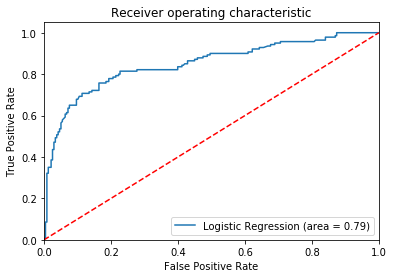

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [61]:
from sklearn import metrics
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))

Accuracy =  0.7936507936507936
Precision =  0.7152777777777778
Recall =  0.7357142857142858


In [64]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [65]:
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))

Accuracy =  0.7804232804232805
Precision =  0.6993006993006993
Recall =  0.7142857142857143


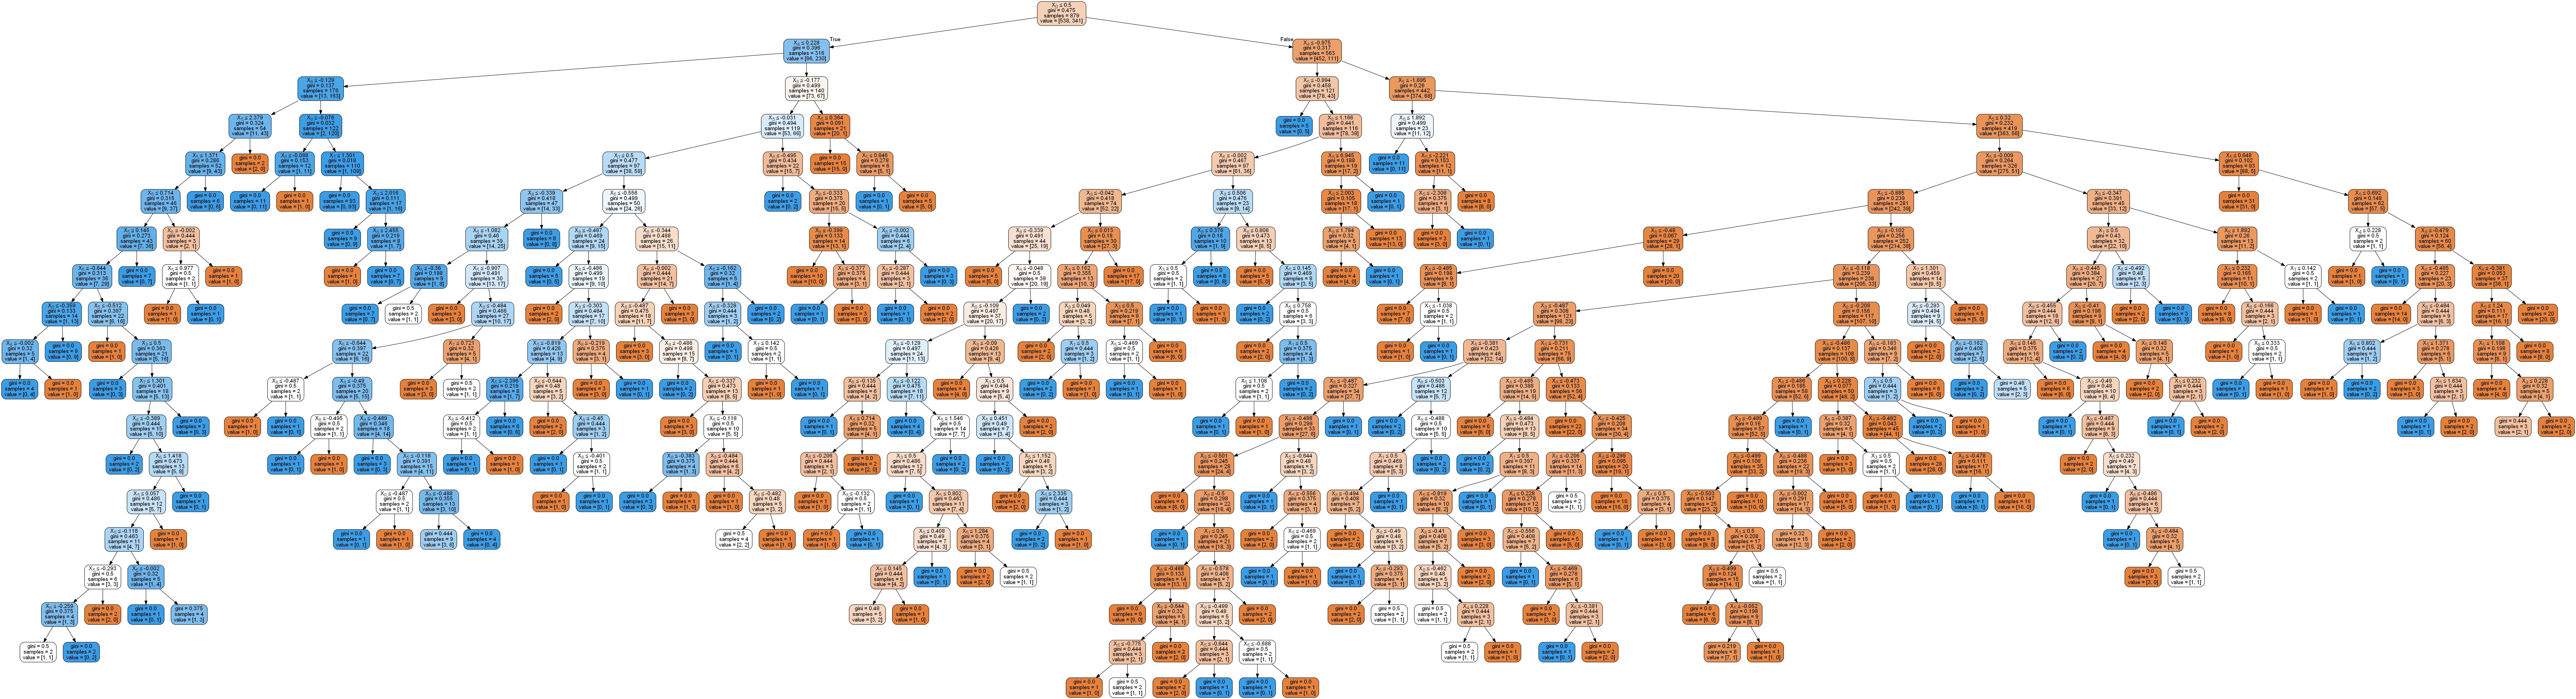

In [66]:
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graphviz.Source(graph)  
Image(graph.create_png())
